<center>

# Python for Quantum Mechanics: 
# Week 5: Excercises

</center>

## Exercise 1: Noise in qubits

$$|000\rangle,\ |001\rangle,\ |010\rangle,\ |011\rangle,\ |100\rangle,\ |101\rangle,\ |110\rangle,\ |111>$$
Run the following cell to generate a data set of 100 numbers between 0 and 7 inclusively called `count`. The array `freq` will give the frequency that each Label the numbers, 0 to 7, with the strings in `qbits_vals`.

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [26]:
count = np.random.randint(8)*np.ones(20)
count = np.append(count,np.random.randint(8,size=80))
freq = np.histogram(count,bins=np.arange(-.5,8.5,1))[0]

qubits_vals = [format(i,'03b') for i in range(8)]
qubit_label = [r'$|' + qubits_val + r'\rangle$' for qubits_val in qubits_vals]

Make a histogram and pie chart of the data. Explode out the largest section in the pie chart. 

In [27]:
print(count)

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 3. 5. 7. 4.
 1. 5. 0. 1. 4. 2. 4. 0. 0. 2. 4. 1. 2. 1. 1. 1. 2. 3. 6. 7. 1. 5. 3. 2.
 6. 7. 0. 2. 2. 0. 1. 4. 3. 7. 6. 0. 3. 7. 0. 5. 4. 7. 7. 0. 3. 4. 7. 2.
 2. 7. 7. 3. 0. 3. 6. 0. 2. 5. 2. 4. 1. 1. 0. 6. 0. 3. 3. 0. 1. 4. 3. 0.
 0. 2. 7. 4.]


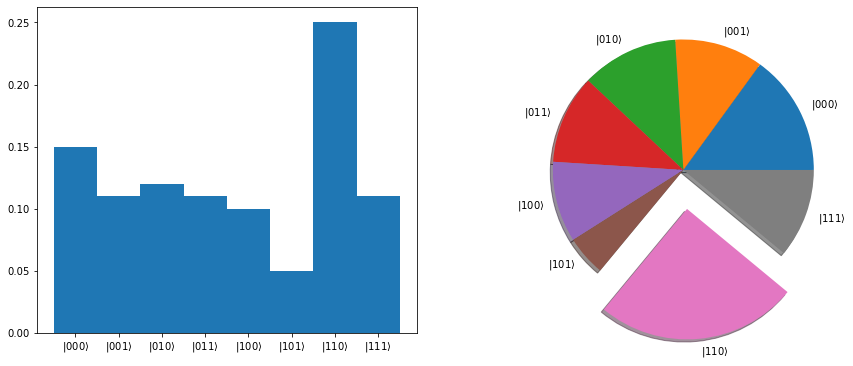

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].hist(count,bins=np.arange(0,9,1)-.5, density=True)
ax[0].set_xticks([0,1,2,3,4,5,6,7])
ax[0].set_xticklabels(qubit_label)

idxmax = list(freq).index(np.max(freq))
expl = np.zeros(8)
expl[idxmax] = .3

ax[1].pie(freq, labels=qubit_label, explode=expl, shadow=True)


plt.show()

In [24]:
idxmax = list(freq).index(np.max(freq))
print(idxmax)

4


## Exercise 2: Particle in a Box

The eigenfunctions of a particle in a 1D box are
$$\psi_n(x) = \sqrt{\frac{2}{l}} \sin \left( \frac{n \pi x}{l} \right).$$

In [42]:
def psi(n,x,l):
    return np.sqrt(2/l) * np.sin(n*np.pi*x/l)

Make a plot of some of these wavefunctions (changing $n \in \mathbb{N}$).

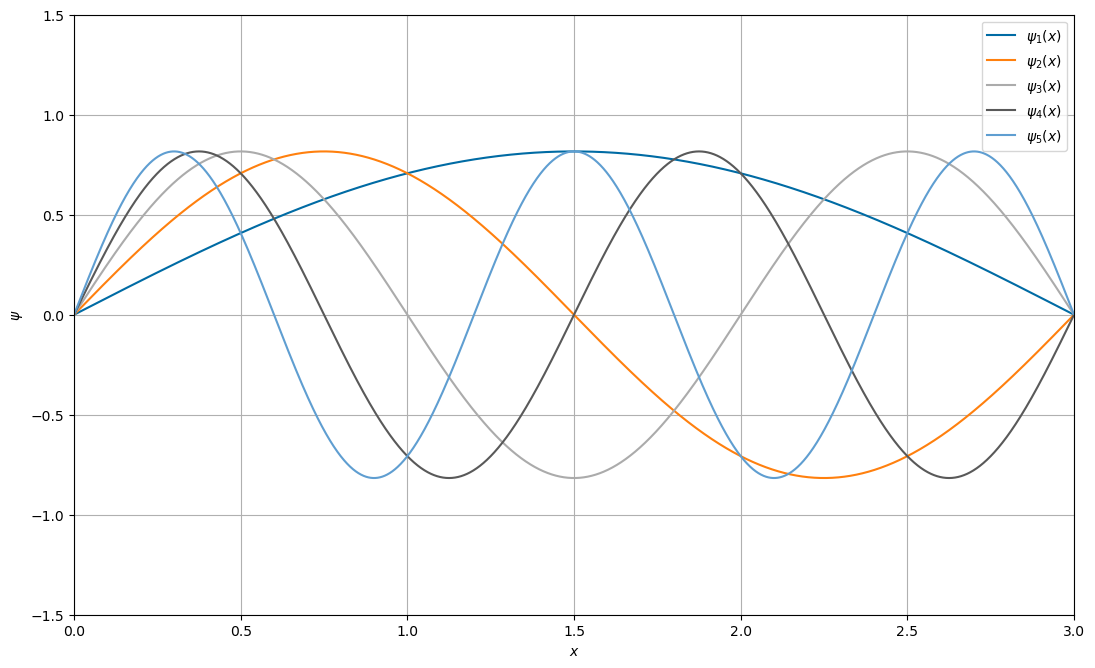

In [113]:
import matplotlib.style as style
style.use('tableau-colorblind10')

l=3
x=np.arange(0,l,.001)


fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

for n in range(1,6):
    ax.plot(x,psi(n,x,l), label='$\psi_'+str(n)+'(x)$')
    
ax.set_xlim(0,l)
ax.set_ylim(-1.5,1.5)
ax.grid()
ax.set_xlabel('$x$')
ax.set_ylabel('$\psi$')

ax.legend()

plt.show()

The the eigenfunctions of a particle in a 2D box are
$$\psi_{(n,m)}(x) = \frac{2}{l} \sin \left( \frac{n \pi x}{l_x} \right) \sin \left( \frac{m \pi y}{l_y} \right).$$

In [46]:
def psi2d(n,m,x,y,lx,ly):
    return (2/np.sqrt(lx*ly)) * np.sin(n*np.pi*x/lx) * np.sin(m*np.pi*y/ly)

Make a plot of this using 3D plot.

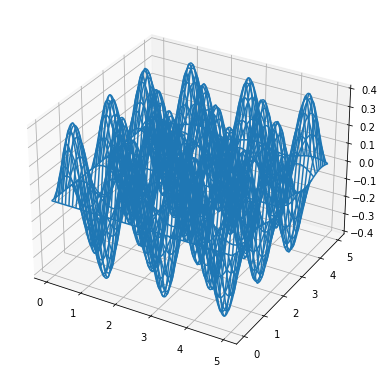

In [66]:
lx=5
ly=5

n=6
m=6

xs=np.arange(0,lx,.01)
ys=np.arange(0,lx,.01)

xmesh, ymesh = np.meshgrid(xs,ys)
zmesh = psi2d(n,m,xmesh,ymesh,lx,ly)

fig = plt.figure(figsize=(lx,ly))
ax = fig.add_axes([0,0,1,1],projection='3d')

ax.plot_wireframe(xmesh, ymesh,zmesh)

plt.show()

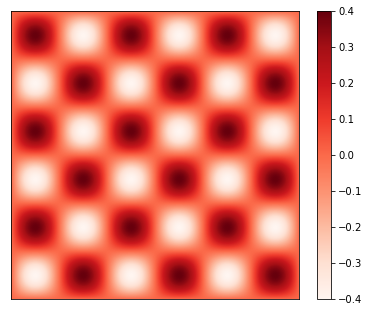

In [60]:
lx=5
ly=5

n=6
m=6

xs=np.arange(0,lx,.01)
ys=np.arange(0,lx,.01)

xmesh, ymesh = np.meshgrid(xs,ys)
zmesh = psi2d(n,m,xmesh,ymesh,lx,ly)

fig = plt.figure(figsize=(lx,ly))
ax = fig.add_axes([0,0,1,1])

im = ax.imshow(zmesh,cmap='Reds')
ax.set_xticks([])
ax.set_yticks([])

fig.colorbar(im,ax=ax,shrink=.8)

plt.show()

## Exercise 3: Normal Distribution

Create an $x$ and $y$ array of a normally distributed numbers. Plot them as the $x$ and $y$ coordinates on a scatter plot. Also make histograms along the $x$ and $y$ axes like this.

<img src="images/normals.png" alt="two dice" width="300"/>

## Exercise 4: Monte Carlo $\pi$ Estimation

Make a visualization of the process of estimating $\pi$ with a Monte Carlo method used in tutoial 4.

In [67]:
import numpy.random as rnd


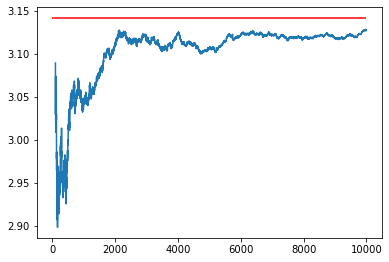

In [72]:
n=10000
x=rnd.random(n)
y=rnd.random(n)

success = x**2 + y**2 < 1

trys = 4*np.cumsum(success)/np.array(range(1,n+1))

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(np.arange(0,n,1)[100:n],trys[100:n])
ax.hlines(np.pi,0,n,color='r')

plt.show()

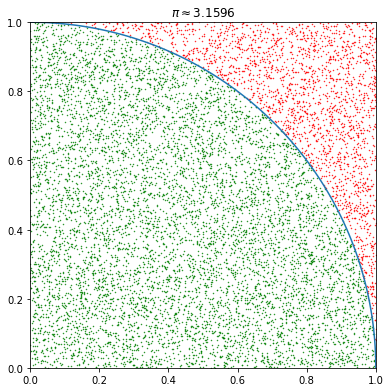

In [88]:
n=10000
x=rnd.random(n)
y=rnd.random(n)

success = x**2 + y**2 < 1

trys = 4*np.cumsum(success)/np.array(range(1,n+1))

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([.1,.1,.8,.8])

theta = np.linspace(0,np.pi/2,100)

pi = 4*sum(success)/n

ax.set_title(r'$\pi \approx' + str(pi) + '$')

ax.scatter(x[success],y[success],.2,c='g',marker='o')
ax.scatter(x[np.invert(success)],y[np.invert(success)],.2,c='r',marker='o')
ax.plot(np.sin(theta),np.cos(theta))

ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.show()

<IPython.core.display.Javascript object>


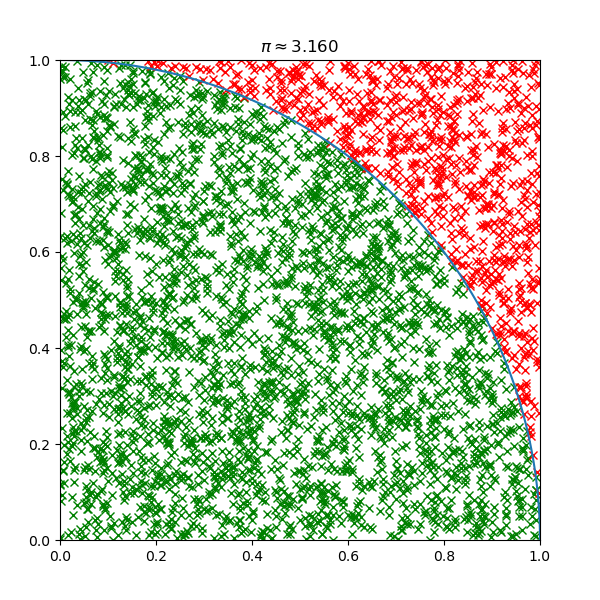

In [105]:
n=10000
x=rnd.random(n)
y=rnd.random(n)

success = x**2 + y**2 < 1
fails = np.invert(success)
x_successes = x[success]
y_successes = y[success]

x_fails = x[fails]
y_fails = y[fails]

trys = 4*np.cumsum(success)/np.array(range(1,n+1))

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([.1,.1,.8,.8])

theta = np.linspace(0,np.pi/2,100)

pi = 4*sum(success)/n
ax.set_title(r'$\pi \approx' + str(pi) + '$')

im1, = ax.plot([],[],'gx')
im2, = ax.plot([],[],'rx')

ax.plot(np.sin(theta),np.cos(theta))

ax.set_xlim(0,1)
ax.set_ylim(0,1)

def init():
    im1.set_data([],[])
    im2.set_data([],[])
    return im1,im2

def animate(i):
    ax.set_title(r'$\pi \approx ' + format(4*sum(success[0:i]/i),'.3f')+ '$')
    im1.set_data(x[0:i][success[0:i]],y[0:i][success[0:i]])
    im2.set_data(x[0:i][fails[0:i]],y[0:i][fails[0:i]])
    return im1,im2

anim = FuncAnimation(fig, animate, init_func=init,frames=10000, interval=.01)

plt.show()

In [102]:
print(x[0:6][success[0:6]],y[success[0:6]])
print(x[fails[0:6]],y[fails[0:6]])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 6

In [101]:
x[success[0:6]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 6

## Exercise 5: Ball Animation

Make an animation where a ball is confined to a box and bounces each time a wall is hit. This should kind of look like the old monitor screensaver